In [55]:
import pandas as pd
import tensorflow_hub as hub
import tensorflow_text as text

In [56]:
df = pd.read_csv(r"D:\Python projects\Machine Learning\Machine_learning Project 1\All Datasets\stock_data.csv")
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [57]:
df.shape

(5791, 2)

In [58]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [59]:
df.Sentiment.value_counts() #pos1 , neg -1from bs4 import BeautifulSoup


 1    3685
-1    2106
Name: Sentiment, dtype: int64

In [60]:
sentiment = []
for i in df.Sentiment:
    if i==1:
        sentiment.append(0) #pos
    else:
        sentiment.append(1) #neg
        
df['sentiment'] = sentiment
df.head()

,Text,Sentiment,sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,0
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,0
2,user I'd be afraid to short AMZN - they are lo...,1,0
3,MNTA Over 12.00,1,0
4,OI Over 21.37,1,0


In [61]:
df.drop('Sentiment',axis='columns',inplace=True)

In [62]:
df_pos = df[df.sentiment==0] #pos
df_neg = df[df.sentiment==1] #neg

In [63]:
df_pos.shape, df_neg.shape

((3685, 2), (2106, 2))

In [64]:
df_pos_reshaped = df_pos.sample(df_neg.shape[0])

df1 = pd.concat([df_pos_reshaped, df_neg], axis=0)
df1.shape

(4212, 2)

In [65]:
df1.sentiment.value_counts()

0    2106
1    2106
Name: sentiment, dtype: int64

In [66]:
df1.head()

,Text,sentiment
1471,"Screw GS utilization lag on BP, I think it's a...",0
578,One small step to send cable TV back to the 80...,0
1275,BAC Consolidation in progress... 33% Done... ;-),0
5612,"Sensex Jumps Over 1,150 Points, Nifty Touches ...",0
3602,big freakin HT to myself as CEE was the ONY st...,0


In [67]:
df1.Text[0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [68]:
X = df1.Text
y = df1.sentiment

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from bs4 import BeautifulSoup
import re

In [75]:
def clean_text(text):
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    text = re.sub(r"[^a-zA-Z.!?']", ' ', text)
    text = re.sub(r" +", ' ', text)
    return text

In [74]:
test_text = '232 '+ X[0]
test_text

'232 Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [76]:
print(clean_text(test_text))

 Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method or method see prev posts


In [90]:
X_cleaned = [clean_text(i) for i in X]
X_cleaned[:5]

["Screw GS utilization lag on BP I think it's a solid buy! ook at that div and MP's are hot right now. Oil still needs to be moved ",
 "One small step to send cable TV back to the s. Quality content exclusive on NFX. Can't wait for the return of AD. ",
 'BAC Consolidation in progress... Done... ',
 'Sensex Jumps Over Points Nifty Touches Ahead Of RBI Announcement ',
 'big freakin HT to myself as CEE was the ONY stock mentioned in my Dec video as a breakout stock for ']

In [91]:
import numpy as np

X_cleaned = np.array(X_cleaned)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y)

In [81]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [82]:
bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [93]:
import tensorflow as tf

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
output = bert_encoder(preprocessed_text)

#Neural network
layer = tf.keras.layers.Dropout(0.1, name='dropout')(output['pooled_output'])
layer = tf.keras.layers.Dense(1, activation='sigmoid',name='output')(layer)

model = tf.keras.Model(inputs=[text_input], outputs=[layer])

In [94]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [95]:
METRICS =[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics= METRICS)

In [96]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
99/99 [==============================] - 580s 6s/step - loss: 0.7105 - accuracy: 0.4986 - precision: 0.5045 - recall: 0.5291
Epoch 2/10
99/99 [==============================] - 580s 6s/step - loss: 0.6976 - accuracy: 0.5353 - precision: 0.5401 - recall: 0.5522
Epoch 3/10
99/99 [==============================] - 565s 6s/step - loss: 0.6953 - accuracy: 0.5283 - precision: 0.5336 - recall: 0.5416
Epoch 4/10
99/99 [==============================] - 556s 6s/step - loss: 0.6823 - accuracy: 0.5492 - precision: 0.5540 - recall: 0.5616
Epoch 5/10
99/99 [==============================] - 575s 6s/step - loss: 0.6863 - accuracy: 0.5524 - precision: 0.5578 - recall: 0.5585
Epoch 6/10
99/99 [==============================] - 591s 6s/step - loss: 0.6776 - accuracy: 0.5793 - precision: 0.5879 - recall: 0.5647
Epoch 7/10
99/99 [==============================] - 597s 6s/step - loss: 0.6817 - accuracy: 0.5613 - precision: 0.5667 - recall: 0.5660
Epoch 8/10
99/99 [==============================

In [97]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 188s 6s/step - loss: 0.6866 - accuracy: 0.5594 - precision: 0.5246 - recall: 0.9053


[0.6865872740745544, 0.5593542456626892, 0.524571418762207, 0.9053254723548889]

In [99]:
predicted = model.predict(X_test)

In [100]:
y_pred = []

for i in predicted:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report


print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.73      0.24      0.36       546
           1       0.52      0.91      0.66       507

    accuracy                           0.56      1053
   macro avg       0.63      0.57      0.51      1053
weighted avg       0.63      0.56      0.51      1053



In [103]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

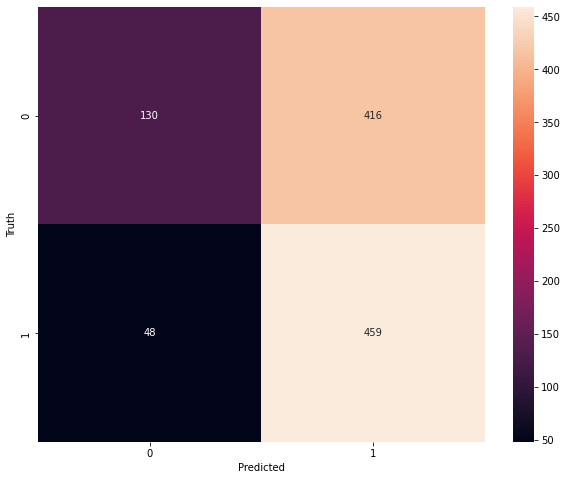

In [104]:
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [106]:
model.save('stock_sentiment_data_model.h5')